In [3]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import matplotlib

import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np
import xarray as xr

from boutdata.restart import addvar
import glob
import shutil
import scipy
import netCDF4 as nc

sys.path.append(r"/home/mike/work/sdtools")


from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.neutral_transport import NeutralTransport
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.balance1d import *
from hermes3.selectors import *

from hermes3.utils import *
# from code_comparison.code_comparison import *

%load_ext autoreload
%autoreload 2

# Overview

### I tuned fast recycling and went to MFP 0.1 with separate limiters and conduction limitation

# Hermes IO

In [2]:
casestore = dict()

In [6]:
db.casepaths

{}

In [9]:
   
db = CaseDB(
    case_dir = r"/home/mike/work/cases",
    grid_dir = r"/home/mike/work/cases"
    )

toload = [
    dict(name="CVODE", id = "m9bb-albedo_0.999_tunepuff_fromscratch_cvode"),
    dict(name="SNES", id = "m9b-albedo_0.999_tunepuff_fromscratch"),
]

cs = {}
for case in toload:
    cs[case["name"]] = db.load_case_2D(case["id"], use_squash = False, verbose = True, unnormalise = True, unnormalise_geom = True)
    cs[case["name"]].extract_2d_tokamak_geometry()

- Reading case m9bb-albedo_0.999_tunepuff_fromscratch_cvode
-----------------------

Unnormalising with xHermes
- Reading case m9b-albedo_0.999_tunepuff_fromscratch
-----------------------

Unnormalising with xHermes


In [ ]:

t.max()

np.float64(0.020058308923069472)

In [22]:
wtime = ds["wtime"].values

wtime.max()

np.float64(5015.153010413)

Text(0, 0.5, 'Simulation time [ms]')

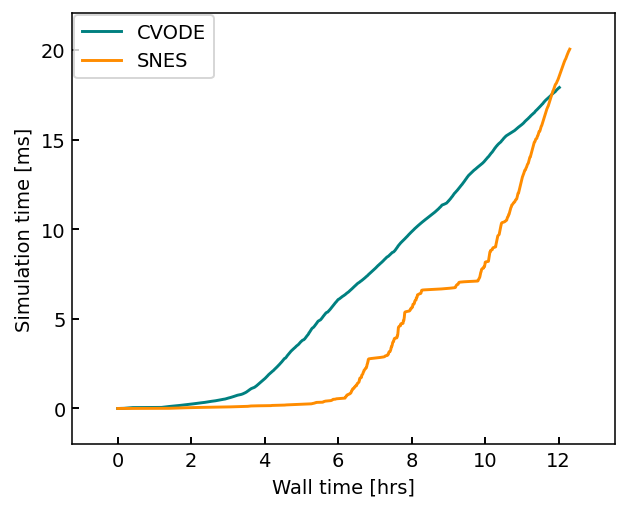

In [30]:


fig, ax = plt.subplots()

for name in ["CVODE", "SNES"]:
    ds = cs[name].ds
    t = ds["t"].values
    wtime = ds["wtime"].cumsum()
    ax.plot(wtime[:-1]/60/60, t[:-1]*1000, label=name)
    
ax.legend()
ax.set_xlabel("Wall time [hrs]")
ax.set_ylabel("Simulation time [ms]")
